# **CIS 545 Final Project**

*   **Term:** 2022 Fall
*   **Group:** 74
*   **Members:** Cheng-Ying Wu, Kuan-Yu Chen, Zhenjun Xia



## Introduction

*   **Data Set Used:** Glassdoor Job Reviews
  *   Link: https://www.kaggle.com/datasets/davidgauthier/glassdoor-job-reviews

*   **Project Description:** Pending
*   **Target:** We want to build a model that can successfully **predict the recommendation (0: Negative, 1: No opinion, 2: Positive)** using the given features in Glassdoor Job Reviews dataset.



## Ideas & To-dos

1.   Deal with NA: drop diversity, others fill with avg
2.   Sentiment analysis for text columns: e.g., Affin
3.   Feature engineering categorical columns: e.g., one-hot encoding, numeric encoding, etc.
4.   PCA
5.   Modeling: Logistic Regression, Decision Tree, Random Forest, MLP, LSTM/GRU, etc.
  *   Predict if recommend (classification: 0, 1, 2)
6.   Visualization: categorical bar chart, heatmap, training loss & accuracy
7.   Analyze results
8.   Summarize to GitHub



# Import Packages & Settings

In [5]:
# Packages Used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

In [6]:
# Settings
# Show all columns
pd.set_option('display.max_columns', None)

# Disable showing warnings
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [8]:
# Read the data
data = pd.read_csv("glassdoor_reviews.csv")
print("Original Number of Data Points:", len(data))
data

Original Number of Data Points: 838566


,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838561,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,4.0,v,v,v,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations
838562,the-LEGO-Group,2021-06-03,Sales Associate,"Current Employee, less than 1 year","London, England, England",3,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,working at lego,staff discount is really nice,micro managing is a hassle\r\ncan become menta...
838563,the-LEGO-Group,2021-06-03,Strategist,Current Employee,NaN,4,5.0,5.0,5.0,3.0,5.0,3.0,v,o,o,not interested in growing their people,loved brand for a lot of people,you can spend 6-10 years without any promotion...
838564,the-LEGO-Group,2021-06-04,Customer Service Representative,"Current Employee, less than 1 year",NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Great Place to Work,"Good wages, good hours, lots of resources","Working every other weekend, busy seasons can ..."


# Data Cleaning
---

1. Get the basic information about the dataset
2. Drop duplicates
3. Drop irrelevant columns
4. Select valid data
5. Round float values to 2 decimals

In [9]:
# Get the basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838566 entries, 0 to 838565
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 838566 non-null  object 
 1   date_review          838566 non-null  object 
 2   job_title            838566 non-null  object 
 3   current              838566 non-null  object 
 4   location             541228 non-null  object 
 5   overall_rating       838566 non-null  int64  
 6   work_life_balance    688672 non-null  float64
 7   culture_values       647193 non-null  float64
 8   diversity_inclusion  136066 non-null  float64
 9   career_opp           691065 non-null  float64
 10  comp_benefits        688484 non-null  float64
 11  senior_mgmt          682690 non-null  float64
 12  recommend            838566 non-null  object 
 13  ceo_approv           838566 non-null  object 
 14  outlook              838566 non-null  object 
 15  headline         

In [10]:
# Simple Statistics
data.describe()

,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
count,838566.000000,688672.000000,647193.000000,136066.000000,691065.000000,688484.000000,682690.000000
mean,3.655956,3.375735,3.590164,3.966612,3.461825,3.398109,3.176576
std,1.174684,1.305874,1.323280,1.190937,1.271295,1.218738,1.330720
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Drop Duplicates

In [11]:
# Get the number of duplicates
print("Number of Duplicates:", len(data) - len(data.drop_duplicates()))

Number of Duplicates: 33515


In [12]:
# Drop duplicates and reset the index
data = data.drop_duplicates().reset_index(drop = True)
print("Number of Data Points After Dropping Duplicates:", len(data))
data

Number of Data Points After Dropping Duplicates: 805051


,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805046,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,4.0,v,v,v,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations
805047,the-LEGO-Group,2021-06-03,Sales Associate,"Current Employee, less than 1 year","London, England, England",3,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,working at lego,staff discount is really nice,micro managing is a hassle\r\ncan become menta...
805048,the-LEGO-Group,2021-06-03,Strategist,Current Employee,NaN,4,5.0,5.0,5.0,3.0,5.0,3.0,v,o,o,not interested in growing their people,loved brand for a lot of people,you can spend 6-10 years without any promotion...
805049,the-LEGO-Group,2021-06-04,Customer Service Representative,"Current Employee, less than 1 year",NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Great Place to Work,"Good wages, good hours, lots of resources","Working every other weekend, busy seasons can ..."


## Deal with Missing Values

In [13]:
# Get the number of missing values for each column
col_nan_num = data.isna().sum().to_dict()
col_nan_num

{'firm': 0,
 'date_review': 0,
 'job_title': 0,
 'current': 0,
 'location': 285090,
 'overall_rating': 0,
 'work_life_balance': 144060,
 'culture_values': 183364,
 'diversity_inclusion': 674160,
 'career_opp': 141726,
 'comp_benefits': 144242,
 'senior_mgmt': 149804,
 'recommend': 0,
 'ceo_approv': 0,
 'outlook': 0,
 'headline': 2099,
 'pros': 0,
 'cons': 8}

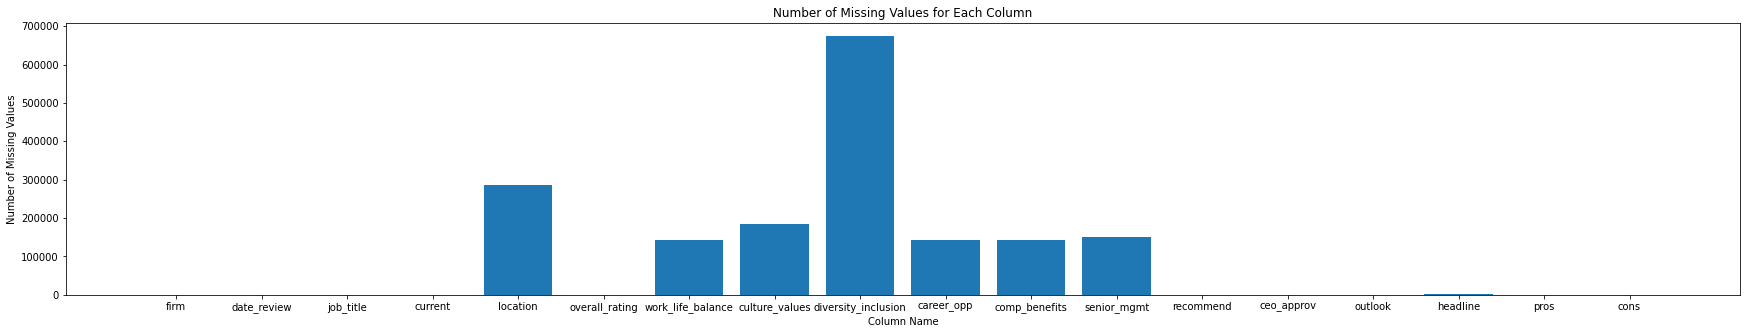

In [14]:
# Plot the number of missing values for each column
fig = plt.figure(figsize = (30, 5))

# Create the bar plot
plt.bar(col_nan_num.keys(), col_nan_num.values())

# Set the appropriate titles and axis labels
plt.xlabel("Column Name")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values for Each Column")
plt.show()

## Drop diversity_inclusion Column
Reason: The diversity_inclusion column is missing too many values

In [15]:
dealedNA_data = data.drop(['diversity_inclusion'], axis=1)
dealedNA_data.columns

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values', 'career_opp',
       'comp_benefits', 'senior_mgmt', 'recommend', 'ceo_approv', 'outlook',
       'headline', 'pros', 'cons'],
      dtype='object')

## Drop location & headline & cons NaN Values

In [16]:
# Drop NA for location & headline & cons columns
dealedNA_data = dealedNA_data.dropna(subset=['location', 'headline', 'cons']).reset_index(drop = True)
dealedNA_data

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
1,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
2,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
3,AFH-Wealth-Management,2016-09-23,IFA,Former Employee,"Bromsgrove, England, England",1,1.0,1.0,1.0,1.0,1.0,x,o,r,It horrible management,Good investment management strategy. Overall t...,The management and seniors are ruthless. No tr...
4,AFH-Wealth-Management,2016-09-25,Anonymous Employee,"Current Employee, more than 5 years","Century City, CA",5,5.0,5.0,5.0,4.0,5.0,v,o,v,Good place to work,The people are great and the culture is very f...,Wouldn't necessarily say there are any cons to...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518452,the-LEGO-Group,2021-05-29,Store Clerk,"Former Employee, more than 3 years","New York, NY",2,NaN,NaN,NaN,NaN,NaN,o,o,o,Friendly staff members at LEGO,"The staff is friendly, you get to be around ch...",Sometimes the children can behave badly. You m...
518453,the-LEGO-Group,2021-05-31,Senior Experience Designer,"Current Employee, less than 1 year",Billund,5,5.0,5.0,5.0,5.0,5.0,v,v,v,Awesome place to work,It's a company with a clear purpose and one th...,"Being a global brand, compliance is important...."
518454,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,v,v,v,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations
518455,the-LEGO-Group,2021-06-03,Sales Associate,"Current Employee, less than 1 year","London, England, England",3,NaN,NaN,NaN,NaN,NaN,o,o,o,working at lego,staff discount is really nice,micro managing is a hassle\r\ncan become menta...


## Check Which Column Still has NaN Values

In [17]:
dealedNA_data.isna().any()

firm                 False
date_review          False
job_title            False
current              False
location             False
overall_rating       False
work_life_balance     True
culture_values        True
career_opp            True
comp_benefits         True
senior_mgmt           True
recommend            False
ceo_approv           False
outlook              False
headline             False
pros                 False
cons                 False
dtype: bool

## Fill work_life_balance, culture_values, career_opp, comp_benefits, senior_mgmt Columns' NaN Values with Average Value of each Column

In [18]:
# Calculate work_life_balance column's mean value
work_life_balance_mean = dealedNA_data["work_life_balance"].mean()
work_life_balance_mean

3.3873857845721314

In [19]:
# Fill work_life_balance column's NaN with its mean value
dealedNA_data["work_life_balance"] = dealedNA_data["work_life_balance"].fillna(work_life_balance_mean)
dealedNA_data["work_life_balance"] = dealedNA_data["work_life_balance"].round(2)
dealedNA_data["work_life_balance"]

0         3.00
1         1.00
2         2.00
3         1.00
4         5.00
          ... 
518452    3.39
518453    5.00
518454    4.00
518455    3.39
518456    4.00
Name: work_life_balance, Length: 518457, dtype: float64

In [20]:
# Calculate culture_values column's mean value
culture_values_mean = dealedNA_data["culture_values"].mean()
culture_values_mean

3.60950905957427

In [21]:
# Fill culture_values column's NaN with its mean value
dealedNA_data["culture_values"] = dealedNA_data["culture_values"].fillna(culture_values_mean)
dealedNA_data["culture_values"] = dealedNA_data["culture_values"].round(2)
dealedNA_data["culture_values"]

0         1.00
1         1.00
2         1.00
3         1.00
4         5.00
          ... 
518452    3.61
518453    5.00
518454    5.00
518455    3.61
518456    5.00
Name: culture_values, Length: 518457, dtype: float64

In [22]:
# Calculate career_opp column's mean value
career_opp_mean = dealedNA_data["career_opp"].mean()
career_opp_mean

3.4723932298517934

In [23]:
# Fill career_opp column's NaN with its mean value
dealedNA_data["career_opp"] = dealedNA_data["career_opp"].fillna(career_opp_mean)
dealedNA_data["career_opp"] = dealedNA_data["career_opp"].round(2)
dealedNA_data["career_opp"]

0         2.00
1         1.00
2         2.00
3         1.00
4         5.00
          ... 
518452    3.47
518453    5.00
518454    4.00
518455    3.47
518456    4.00
Name: career_opp, Length: 518457, dtype: float64

In [24]:
# Calculate comp_benefits column's mean value
comp_benefits_mean = dealedNA_data["comp_benefits"].mean()
comp_benefits_mean

3.411876502304816

In [25]:
# Fill comp_benefits column's NaN with its mean value
dealedNA_data["comp_benefits"] = dealedNA_data["comp_benefits"].fillna(comp_benefits_mean)
dealedNA_data["comp_benefits"] = dealedNA_data["comp_benefits"].round(2)
dealedNA_data["comp_benefits"]

0         1.00
1         1.00
2         1.00
3         1.00
4         4.00
          ... 
518452    3.41
518453    5.00
518454    4.00
518455    3.41
518456    5.00
Name: comp_benefits, Length: 518457, dtype: float64

In [26]:
# Calculate senior_mgmt column's mean value
senior_mgmt_mean = dealedNA_data["senior_mgmt"].mean()
senior_mgmt_mean

3.1931427409587965

In [27]:
# Fill senior_mgmt column's NaN with its mean value
dealedNA_data["senior_mgmt"] = dealedNA_data["senior_mgmt"].fillna(senior_mgmt_mean)
dealedNA_data["senior_mgmt"] = dealedNA_data["senior_mgmt"].round(2)
dealedNA_data["senior_mgmt"]

0         4.00
1         1.00
2         1.00
3         1.00
4         5.00
          ... 
518452    3.19
518453    5.00
518454    4.00
518455    3.19
518456    5.00
Name: senior_mgmt, Length: 518457, dtype: float64

## Check Again NaN Values

In [28]:
dealedNA_data.isna().any()

firm                 False
date_review          False
job_title            False
current              False
location             False
overall_rating       False
work_life_balance    False
culture_values       False
career_opp           False
comp_benefits        False
senior_mgmt          False
recommend            False
ceo_approv           False
outlook              False
headline             False
pros                 False
cons                 False
dtype: bool

No NaN values left!!

# Feature Engineering

## Deal with Categorical Columns

### Convert *firm* Column Strings to Unique Numerical Values

In [29]:
# Use a dictionary to store each firm's id
firm_map = {}
for i, f in enumerate(dealedNA_data['firm'].unique()):
    firm_map[f[:]] = i
len(firm_map)

428

In [30]:
dealedNA_data['firm_id'] = dealedNA_data['firm'].apply(lambda x: firm_map[x[:]])
dealedNA_data['firm_id']

0           0
1           0
2           0
3           0
4           0
         ... 
518452    427
518453    427
518454    427
518455    427
518456    427
Name: firm_id, Length: 518457, dtype: int64

### Convert *job_title* Column Strings to Unique Numerical Values

In [31]:
# Use a dictionary to store each job's id
job_map = {}
for i, job in enumerate(dealedNA_data['job_title'].unique()):
    job_map[job[1:]] = i
len(job_map)

56338

In [32]:
dealedNA_data['job_id'] = dealedNA_data['job_title'].apply(lambda x: job_map[x[1:]])
dealedNA_data['job_id']

0             0
1             0
2             0
3             1
4             2
          ...  
518452    25287
518453    56337
518454      230
518455      141
518456     2066
Name: job_id, Length: 518457, dtype: int64

### Convert *current* Column Strings to Unique Numerical Values

In [33]:
# Use a dictionary to store each current's id
current_map = {}
for i, job in enumerate(dealedNA_data['current'].unique()):
    current_map[job[:]] = i
len(current_map)

25

In [34]:
# Get the number of missing values for each column
current_col_num = dealedNA_data['current'].value_counts().to_dict()
current_col_num

{'Current Employee': 88451,
 'Current Employee, more than 1 year': 66479,
 'Former Employee, more than 1 year': 53013,
 'Current Employee, more than 3 years': 52625,
 'Former Employee': 47876,
 'Current Employee, less than 1 year': 39846,
 'Former Employee, more than 3 years': 34556,
 'Former Employee, less than 1 year': 33574,
 'Current Employee, more than 5 years': 31141,
 'Current Employee, more than 10 years': 18678,
 'Former Employee, more than 5 years': 17893,
 'Current Employee, more than 8 years': 14108,
 'Former Employee, more than 10 years': 11861,
 'Former Employee, more than 8 years': 8334,
 'Former Contractor, less than 1 year': 4,
 'Former Intern, less than 1 year': 4,
 'Current Contractor, less than 1 year': 3,
 'Current Contractor, more than 1 year': 3,
 'KEY NOT FOUND: jobLine.per_diem-former': 2,
 'Current Intern, less than 1 year': 1,
 'Former Contractor, more than 1 year': 1,
 'Former Contractor, more than 8 years': 1,
 'Former Temporary Employee': 1,
 'Current Free

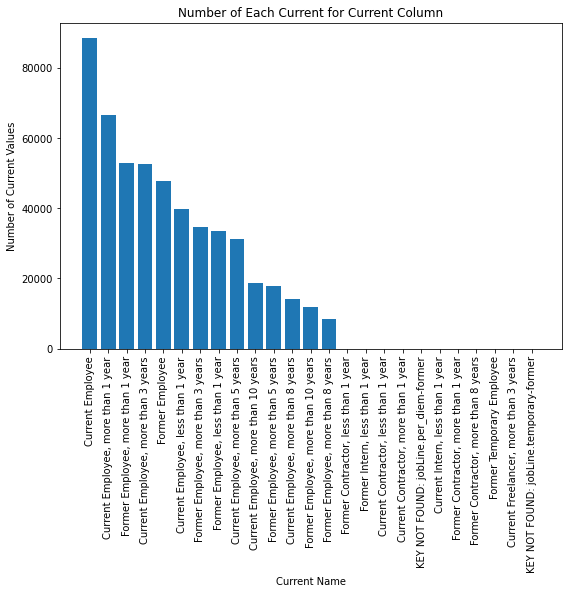

In [35]:
# Plot the number of missing values for each column
fig = plt.figure(figsize = (9, 6))

# Create the bar plot
plt.bar(current_col_num.keys(), current_col_num.values())

# Set the appropriate titles and axis labels
plt.xlabel("Current Name")
plt.ylabel("Number of Current Values")
plt.title("Number of Each Current for Current Column")
plt.xticks(rotation=90)
plt.show()

In [36]:
dealedNA_data['current_id'] = dealedNA_data['current'].apply(lambda x: current_map[x[:]])
dealedNA_data['current_id']

0         0
1         1
2         0
3         2
4         3
         ..
518452    4
518453    1
518454    3
518455    1
518456    7
Name: current_id, Length: 518457, dtype: int64

### Convert *location* Column Strings to Unique Numerical Values

In [37]:
# Use a dictionary to store each location's id
location_map = {}
for i, job in enumerate(dealedNA_data['location'].unique()):
    location_map[job[:]] = i
len(location_map)

14476

In [38]:
dealedNA_data['location_id'] = dealedNA_data['location'].apply(lambda x: location_map[x[:]])
dealedNA_data['location_id']

0             0
1             0
2             0
3             0
4             1
          ...  
518452      195
518453    14464
518454      817
518455       13
518456    14465
Name: location_id, Length: 518457, dtype: int64

### Convert *recommend* Column Values to Integers and Store them in the *label* Column
1. Convert recommend column values to integers
2. Store the integers in the label column
3. Drop recommend column values

Note:

Ranking for the *recommendation of the firm*, *CEO approval*, and *outlook* are allocated categories v, r, x, and o, with the following meanings:
**v - Positive**, **r - Mild**, **x - Negative**, **o - No opinion**

In [39]:
def rec_score(rec):
    """
    Returns 2 if the input value is 'v', 1 if the input value is 'o', and 0 if the input value is 'x'.
    """
    if rec == 'v':
        return 2
    elif rec == 'o':
        return 1
    else:
        # rec = 'x'
        return 0

In [40]:
dealedNA_data['label'] = dealedNA_data['recommend'].apply(lambda x: rec_score(x))
dealedNA_data[['recommend', 'label']]

,recommend,label
0,x,0
1,x,0
2,x,0
3,x,0
4,v,2
...,...,...
518452,o,1
518453,v,2
518454,v,2
518455,o,1


### Convert *ceo_approv*, *outlook* Columns Values to Integer Values

In [41]:
def convert_score(rec):
    if rec == 'v':
      return 3
    elif rec == 'r':
      return 2
    elif rec == 'o':
      return 1
    else:
      # rec = 'x'
      return 0

In [42]:
dealedNA_data['ceo_approv'] = dealedNA_data['ceo_approv'].apply(lambda x: convert_score(x))
dealedNA_data['outlook'] = dealedNA_data['outlook'].apply(lambda x: convert_score(x))
dealedNA_data[['ceo_approv', 'outlook']]

,ceo_approv,outlook
0,1,2
1,1,0
2,1,0
3,1,2
4,1,3
...,...,...
518452,1,1
518453,3,3
518454,3,3
518455,1,1


## Deal with Textual Columns

*  Convert to numerical values using the Afinn score



### Convert Headline to Score (Using Afinn)

In [43]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.5 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=025a805f1f7fdc5af4dd694fed88652c126d724f82bdcd5eb9d268136bce69b7
  Stored in directory: /root/.cache/pip/wheels/f6/6f/c3/b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [44]:
from afinn import Afinn

In [45]:
afinn = Afinn(language='en')
dealedNA_data['headline_score'] = dealedNA_data['headline'].apply(afinn.score)
# dealedNA_data = dealedNA_data.drop(['headline'], axis=1)
dealedNA_data['headline_score']

0         1.0
1        -3.0
2         0.0
3        -3.0
4         3.0
         ... 
518452    2.0
518453    4.0
518454    4.0
518455    0.0
518456    2.0
Name: headline_score, Length: 518457, dtype: float64

### Convert Pros to Score (Using Afinn)

In [46]:
dealedNA_data['pros_score'] = dealedNA_data['pros'].apply(afinn.score)
# dealedNA_data = dealedNA_data.drop(['pros'], axis=1)
dealedNA_data['pros_score']

0          3.0
1          1.0
2          4.0
3          8.0
4          5.0
          ... 
518452     4.0
518453     3.0
518454    10.0
518455     3.0
518456    19.0
Name: pros_score, Length: 518457, dtype: float64

### Convert Cons to Score (Using Afinn)

In [47]:
dealedNA_data['cons_score'] = dealedNA_data['cons'].apply(afinn.score)
# dealedNA_data = dealedNA_data.drop(['cons'], axis=1)
dealedNA_data['cons_score']

0        -3.0
1         0.0
2        -4.0
3        -5.0
4         2.0
         ... 
518452   -7.0
518453    2.0
518454    1.0
518455    0.0
518456    1.0
Name: cons_score, Length: 518457, dtype: float64

## Deal with Date Column

### Convert date_review to Numerical Values

In [48]:
import datetime

# Change the data type to datetime
dealedNA_data['date_review'] = pd.to_datetime(dealedNA_data['date_review'], format='%Y-%m-%d')
dealedNA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518457 entries, 0 to 518456
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   firm               518457 non-null  object        
 1   date_review        518457 non-null  datetime64[ns]
 2   job_title          518457 non-null  object        
 3   current            518457 non-null  object        
 4   location           518457 non-null  object        
 5   overall_rating     518457 non-null  int64         
 6   work_life_balance  518457 non-null  float64       
 7   culture_values     518457 non-null  float64       
 8   career_opp         518457 non-null  float64       
 9   comp_benefits      518457 non-null  float64       
 10  senior_mgmt        518457 non-null  float64       
 11  recommend          518457 non-null  object        
 12  ceo_approv         518457 non-null  int64         
 13  outlook            518457 non-null  int64   

In [49]:
# Find the earliest date in date_review and use this date as the baseline
base_date = dealedNA_data['date_review'].min()
base_date

Timestamp('2008-01-31 00:00:00')

In [50]:
# Convert to the difference between the baseline in terms of total seconds
dealedNA_data['date_num'] = dealedNA_data['date_review'].apply(lambda x: int(abs((x - base_date).total_seconds())))
dealedNA_data['date_num']

0         248054400
1         252201600
2         259632000
3         272851200
4         273024000
            ...    
518452    420508800
518453    420681600
518454    420854400
518455    420940800
518456    421027200
Name: date_num, Length: 518457, dtype: int64

# Extract Features & Labels

In [51]:
# Get numerical feature columns
num_type = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Remember to drop the label
features = dealedNA_data.select_dtypes(include = num_type).drop(['label'], axis = 1)
features

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,ceo_approv,outlook,firm_id,job_id,current_id,location_id,headline_score,pros_score,cons_score,date_num
0,2,3.00,1.00,2.00,1.00,4.00,1,2,0,0,0,0,1.0,3.0,-3.0,248054400
1,1,1.00,1.00,1.00,1.00,1.00,1,0,0,0,1,0,-3.0,1.0,0.0,252201600
2,1,2.00,1.00,2.00,1.00,1.00,1,0,0,0,0,0,0.0,4.0,-4.0,259632000
3,1,1.00,1.00,1.00,1.00,1.00,1,2,0,1,2,0,-3.0,8.0,-5.0,272851200
4,5,5.00,5.00,5.00,4.00,5.00,1,3,0,2,3,1,3.0,5.0,2.0,273024000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518452,2,3.39,3.61,3.47,3.41,3.19,1,1,427,25287,4,195,2.0,4.0,-7.0,420508800
518453,5,5.00,5.00,5.00,5.00,5.00,3,3,427,56337,1,14464,4.0,3.0,2.0,420681600
518454,5,4.00,5.00,4.00,4.00,4.00,3,3,427,230,3,817,4.0,10.0,1.0,420854400
518455,3,3.39,3.61,3.47,3.41,3.19,1,1,427,141,1,13,0.0,3.0,0.0,420940800


In [52]:
# Get the label (recommend)
labels = dealedNA_data['label']
labels

0         0
1         0
2         0
3         0
4         2
         ..
518452    1
518453    2
518454    2
518455    1
518456    2
Name: label, Length: 518457, dtype: int64

In [53]:
# Get the combined dataframe (features + labels)
data_df = pd.concat([features, pd.DataFrame(labels)], axis = 1)
data_df

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,ceo_approv,outlook,firm_id,job_id,current_id,location_id,headline_score,pros_score,cons_score,date_num,label
0,2,3.00,1.00,2.00,1.00,4.00,1,2,0,0,0,0,1.0,3.0,-3.0,248054400,0
1,1,1.00,1.00,1.00,1.00,1.00,1,0,0,0,1,0,-3.0,1.0,0.0,252201600,0
2,1,2.00,1.00,2.00,1.00,1.00,1,0,0,0,0,0,0.0,4.0,-4.0,259632000,0
3,1,1.00,1.00,1.00,1.00,1.00,1,2,0,1,2,0,-3.0,8.0,-5.0,272851200,0
4,5,5.00,5.00,5.00,4.00,5.00,1,3,0,2,3,1,3.0,5.0,2.0,273024000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518452,2,3.39,3.61,3.47,3.41,3.19,1,1,427,25287,4,195,2.0,4.0,-7.0,420508800,1
518453,5,5.00,5.00,5.00,5.00,5.00,3,3,427,56337,1,14464,4.0,3.0,2.0,420681600,2
518454,5,4.00,5.00,4.00,4.00,4.00,3,3,427,230,3,817,4.0,10.0,1.0,420854400,2
518455,3,3.39,3.61,3.47,3.41,3.19,1,1,427,141,1,13,0.0,3.0,0.0,420940800,1


# Correlation of Each Processed Column

*   Plot the correlation heatmap using different kinds of methods
  *   Pearson
  *   Spearman
  *   Kendall






In [54]:
# Check the correlation for the data_df (Pearson)
correlation = data_df.corr(method='pearson').round(2)
correlation

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,ceo_approv,outlook,firm_id,job_id,current_id,location_id,headline_score,pros_score,cons_score,date_num,label
overall_rating,1.00,0.54,0.71,0.68,0.58,0.71,0.36,0.46,0.02,0.03,-0.01,-0.03,0.40,0.19,0.16,0.13,0.66
work_life_balance,0.54,1.00,0.55,0.41,0.44,0.54,0.26,0.31,0.05,0.04,-0.02,-0.01,0.26,0.16,0.14,0.05,0.45
culture_values,0.71,0.55,1.00,0.63,0.53,0.73,0.38,0.46,0.01,0.03,-0.03,-0.03,0.34,0.21,0.15,0.07,0.61
career_opp,0.68,0.41,0.63,1.00,0.56,0.66,0.34,0.45,0.00,0.02,-0.03,-0.03,0.31,0.18,0.12,0.10,0.56
comp_benefits,0.58,0.44,0.53,0.56,1.00,0.54,0.31,0.37,-0.01,0.02,-0.01,-0.04,0.27,0.22,0.12,0.07,0.46
senior_mgmt,0.71,0.54,0.73,0.66,0.54,1.00,0.39,0.46,0.01,0.02,-0.05,-0.02,0.33,0.19,0.14,0.10,0.60
ceo_approv,0.36,0.26,0.38,0.34,0.31,0.39,1.00,0.52,-0.02,0.01,-0.06,-0.02,0.20,0.18,0.10,-0.06,0.45
outlook,0.46,0.31,0.46,0.45,0.37,0.46,0.52,1.00,0.00,0.02,-0.08,-0.01,0.23,0.16,0.11,0.07,0.57
firm_id,0.02,0.05,0.01,0.00,-0.01,0.01,-0.02,0.00,1.00,0.22,0.01,0.11,0.00,0.00,-0.01,0.02,0.01
job_id,0.03,0.04,0.03,0.02,0.02,0.02,0.01,0.02,0.22,1.00,0.01,0.07,0.01,0.01,-0.00,0.02,0.02


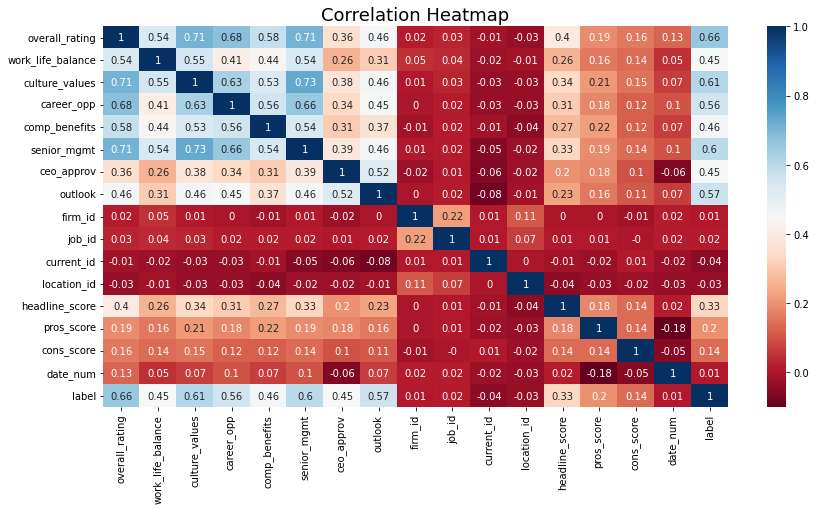

In [55]:
# Use the heatmap to observe the correlation between each column of data_df
f, ax = plt.subplots(1, 1, figsize=(14, 7))

sns.heatmap(correlation, cmap = 'RdBu', vmin = -0.1, vmax = 1, annot=True)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

In [56]:
# Check the correlation for the data_df (Spearman)
correlation = data_df.corr(method='spearman').round(2)
correlation

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,ceo_approv,outlook,firm_id,job_id,current_id,location_id,headline_score,pros_score,cons_score,date_num,label
overall_rating,1.00,0.52,0.67,0.65,0.56,0.70,0.34,0.44,0.02,0.05,-0.01,-0.01,0.38,0.20,0.15,0.14,0.60
work_life_balance,0.52,1.00,0.52,0.38,0.42,0.52,0.25,0.29,0.05,0.03,-0.02,-0.01,0.25,0.16,0.14,0.06,0.41
culture_values,0.67,0.52,1.00,0.60,0.51,0.70,0.38,0.47,0.01,0.05,-0.05,0.00,0.32,0.22,0.14,0.08,0.58
career_opp,0.65,0.38,0.60,1.00,0.53,0.64,0.33,0.44,0.00,0.05,-0.04,0.01,0.29,0.18,0.10,0.10,0.53
comp_benefits,0.56,0.42,0.51,0.53,1.00,0.52,0.29,0.35,-0.00,0.03,-0.01,0.01,0.26,0.22,0.11,0.07,0.43
senior_mgmt,0.70,0.52,0.70,0.64,0.52,1.00,0.35,0.43,0.01,0.04,-0.04,0.00,0.32,0.18,0.13,0.12,0.54
ceo_approv,0.34,0.25,0.38,0.33,0.29,0.35,1.00,0.53,-0.02,0.03,-0.06,0.02,0.20,0.18,0.10,-0.08,0.48
outlook,0.44,0.29,0.47,0.44,0.35,0.43,0.53,1.00,0.00,0.04,-0.09,0.02,0.22,0.17,0.11,0.02,0.60
firm_id,0.02,0.05,0.01,0.00,-0.00,0.01,-0.02,0.00,1.00,0.07,0.01,0.02,0.01,0.00,-0.01,0.02,0.01
job_id,0.05,0.03,0.05,0.05,0.03,0.04,0.03,0.04,0.07,1.00,0.00,0.06,0.03,0.01,0.01,0.05,0.04


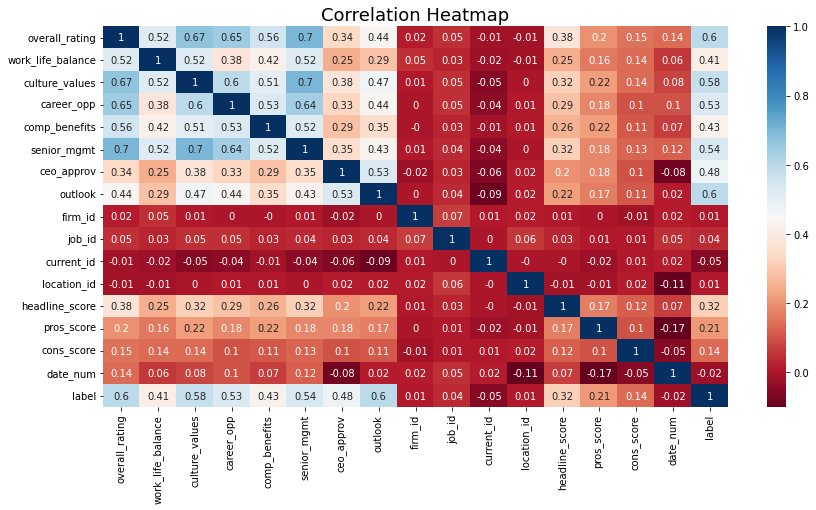

In [57]:
# Use the heatmap to observe the correlation between each column of data_df
f, ax = plt.subplots(1, 1, figsize=(14, 7))

sns.heatmap(correlation, cmap = 'RdBu', vmin = -0.1, vmax = 1, annot=True)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

In [58]:
# Check the correlation for the data_df (Kendall)
correlation = data_df.corr(method='kendall').round(2)
correlation

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,ceo_approv,outlook,firm_id,job_id,current_id,location_id,headline_score,pros_score,cons_score,date_num,label
overall_rating,1.00,0.43,0.58,0.57,0.48,0.60,0.29,0.38,0.02,0.04,-0.01,-0.01,0.32,0.15,0.12,0.11,0.53
work_life_balance,0.43,1.00,0.44,0.32,0.35,0.44,0.21,0.24,0.04,0.02,-0.02,-0.01,0.21,0.12,0.11,0.04,0.36
culture_values,0.58,0.44,1.00,0.51,0.43,0.61,0.32,0.40,0.01,0.04,-0.04,0.00,0.26,0.17,0.11,0.05,0.51
career_opp,0.57,0.32,0.51,1.00,0.46,0.55,0.27,0.37,0.00,0.04,-0.03,0.01,0.24,0.14,0.08,0.07,0.47
comp_benefits,0.48,0.35,0.43,0.46,1.00,0.44,0.24,0.29,-0.00,0.02,-0.01,0.01,0.21,0.17,0.09,0.05,0.37
senior_mgmt,0.60,0.44,0.61,0.55,0.44,1.00,0.29,0.35,0.01,0.03,-0.03,0.00,0.26,0.14,0.10,0.09,0.47
ceo_approv,0.29,0.21,0.32,0.27,0.24,0.29,1.00,0.47,-0.01,0.02,-0.05,0.01,0.17,0.14,0.08,-0.06,0.43
outlook,0.38,0.24,0.40,0.37,0.29,0.35,0.47,1.00,0.00,0.03,-0.07,0.01,0.19,0.14,0.09,0.02,0.54
firm_id,0.02,0.04,0.01,0.00,-0.00,0.01,-0.01,0.00,1.00,0.06,0.01,0.02,0.00,0.00,-0.01,0.01,0.01
job_id,0.04,0.02,0.04,0.04,0.02,0.03,0.02,0.03,0.06,1.00,0.00,0.04,0.02,0.00,0.00,0.03,0.03


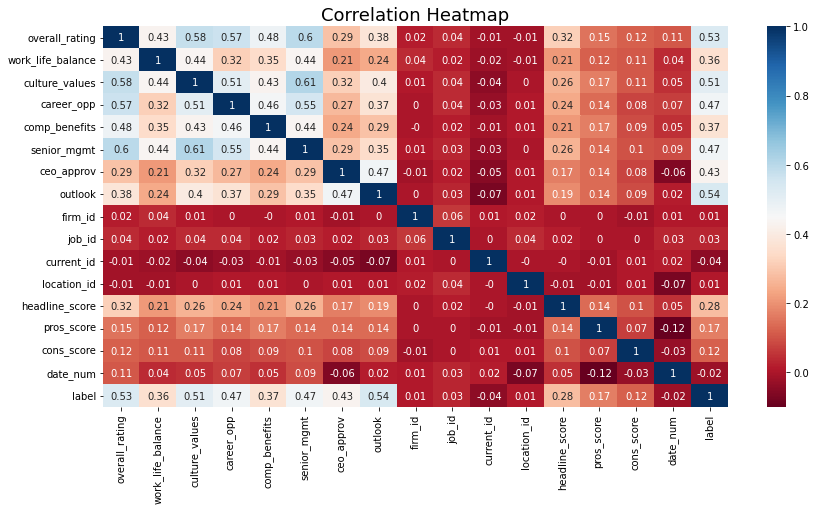

In [59]:
# Use the heatmap to observe the correlation between each column of data_df
f, ax = plt.subplots(1, 1, figsize=(14, 7))

sns.heatmap(correlation, cmap = 'RdBu', vmin = -0.1, vmax = 1, annot=True)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

# Data Visualization

Visualize some categorical columns to bar plots

Ranking for the *recommendation of the firm*: **2 - Positive**, **1 - No opinion**, **0 - Negative**

{0: 119527, 2: 296019, 1: 102911}


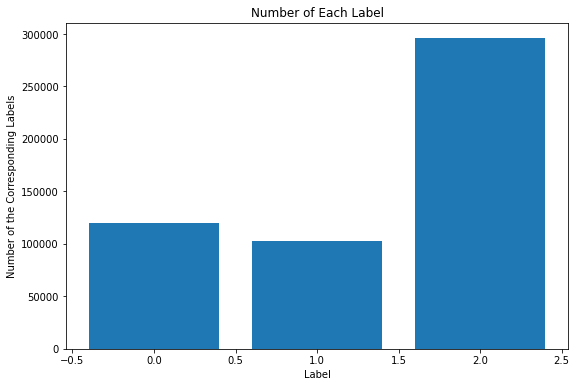

In [60]:
from collections import Counter

# recommend (our label)
label_dict = dict(Counter(data_df.label))
print(label_dict)

# Plotting
fig = plt.figure(figsize = (9, 6))

# Create the bar plot
plt.bar(label_dict.keys(), label_dict.values())

# Set the appropriate titles and axis labels
plt.xlabel("Label")
plt.ylabel("Number of the Corresponding Labels")
plt.title("Number of Each Label")
plt.show()

Observation: Most of the recommendations are **positive**.

Ranking for the *CEO approval* and *outlook* are allocated categories v, r, x, and o, with the following meanings: **3 - Positive**, **2 - Mild**, **1 - No opinion**, **0 - Negative**

{1: 154126, 0: 43139, 3: 200250, 2: 120942}


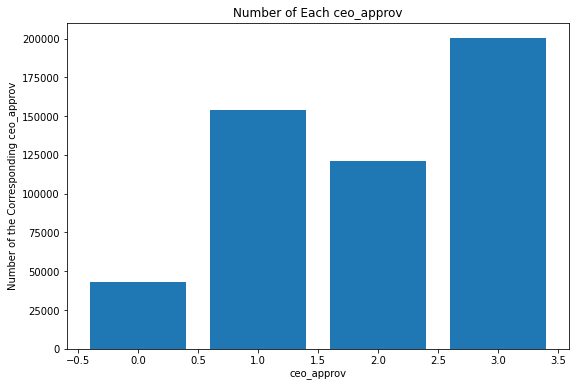

In [61]:
# ceo_approv
ceo_approv_dict = dict(Counter(data_df.ceo_approv))
print(ceo_approv_dict)

# Plotting
fig = plt.figure(figsize = (9, 6))

# Create the bar plot
plt.bar(ceo_approv_dict.keys(), ceo_approv_dict.values())

# Set the appropriate titles and axis labels
plt.xlabel("ceo_approv")
plt.ylabel("Number of the Corresponding ceo_approv")
plt.title("Number of Each ceo_approv")
plt.show()

{2: 106785, 0: 60277, 3: 213365, 1: 138030}


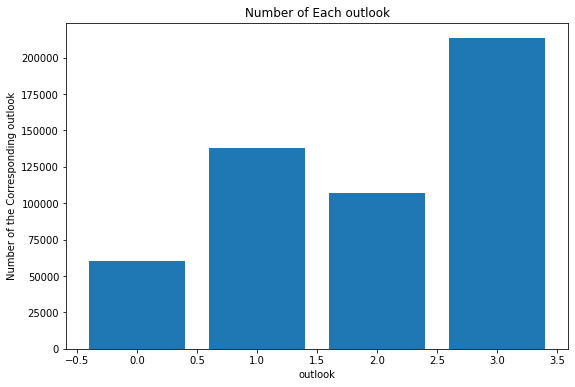

In [62]:
# outlook
outlook_dict = dict(Counter(data_df.outlook))
print(outlook_dict)

# Plotting
fig = plt.figure(figsize = (9, 6))

# Create the bar plot
plt.bar(outlook_dict.keys(), outlook_dict.values())

# Set the appropriate titles and axis labels
plt.xlabel("outlook")
plt.ylabel("Number of the Corresponding outlook")
plt.title("Number of Each outlook")
plt.show()

{2: 46421, 1: 39051, 5: 148580, 4: 168880, 3: 115525}


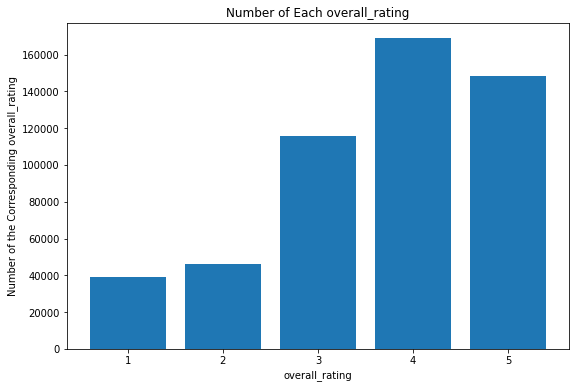

In [63]:
# overall_rating
overall_rating_dict = dict(Counter(data_df.overall_rating))
print(overall_rating_dict)

# Plotting
fig = plt.figure(figsize = (9, 6))

# Create the bar plot
plt.bar(overall_rating_dict.keys(), overall_rating_dict.values())

# Set the appropriate titles and axis labels
plt.xlabel("overall_rating")
plt.ylabel("Number of the Corresponding overall_rating")
plt.title("Number of Each overall_rating")
plt.show()

# Reduce Dimensionality
*   Perform PCA



In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale data for PCA since it is not scale-invariant
scaler = StandardScaler()

# Fit & Transform on the whole dataset features
scaled_features = scaler.fit_transform(features)

# Fit PCA model on all components
pca = PCA(n_components = scaled_features.shape[1])
pca.fit(scaled_features)

PCA(n_components=16)

## Use the Cumulative Explained Variance Ratio to Determine the Number of Components to Keep

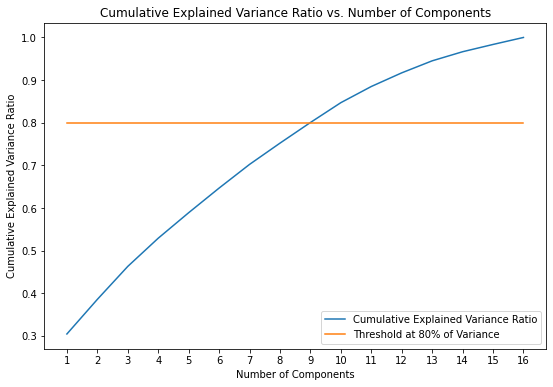

In [65]:
fig = plt.figure(figsize = (9, 6))

# Plot the cumulative explained_variance_ratio against the number of components
plt.plot(np.arange(1, scaled_features.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), label = "Cumulative Explained Variance Ratio")

# Add a horizontal line that represents the 80% of the variance as a threshold
plt.plot(np.arange(1, scaled_features.shape[1]+1), [0.8]*scaled_features.shape[1], label = "Threshold at 80% of Variance")

# Set the title and axes labels
plt.title("Cumulative Explained Variance Ratio vs. Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")

# Display all the x-axis values
plt.xticks(np.arange(1, scaled_features.shape[1]+1))

# Set the legend
plt.legend(loc="lower right")
plt.show()

From the results above, we find that two lines intersect at n = 9, so we decided to use 9 as the number of components to keep

In [66]:
# Refit and transform with parameter n (as deduced from the last step) 
pca = PCA(n_components = 9)
pca_features = pca.fit_transform(scaled_features)
pca_features

array([[ 2.74709444,  1.69827306, -0.71351738, ...,  0.58097034,
         0.10123498,  0.86693173],
       [ 5.7050049 ,  1.87693954, -0.49763909, ..., -0.21658821,
        -1.15652331,  0.66874408],
       [ 4.87961392,  1.80250467, -0.57426527, ...,  1.10043238,
         0.10302998,  0.95986182],
       ...,
       [-2.68422882, -0.85946618,  0.44564003, ..., -0.11690906,
         1.45641863, -1.88862905],
       [ 0.80434604, -1.38942372, -0.69903654, ...,  0.61632334,
        -0.30356982, -2.03669724],
       [-2.62558026, -2.99891868,  2.97585802, ...,  1.19924236,
         1.21570944, -0.66290856]])

In [67]:
# Convert to dataframe
pca_features = pd.DataFrame(pca_features, columns = [("pca_"+str(i)) for i in range(1, 10)])
pca_features

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
0,2.747094,1.698273,-0.713517,1.439968,0.360567,-0.142941,0.580970,0.101235,0.866932
1,5.705005,1.876940,-0.497639,1.039573,0.477505,-0.420322,-0.216588,-1.156523,0.668744
2,4.879614,1.802505,-0.574265,1.157026,0.541213,-0.116753,1.100432,0.103030,0.959862
3,5.100993,1.987725,-0.286458,1.860366,0.031170,0.993773,0.347586,-0.306757,0.583867
4,-2.722874,1.510811,-0.921311,-0.310998,0.220035,-0.918095,0.641442,-0.691107,0.906441
...,...,...,...,...,...,...,...,...,...
518452,1.108956,-2.725374,-0.440934,0.181971,1.225974,1.073381,1.612581,0.724866,-0.550920
518453,-3.568435,-6.030356,2.615392,1.920197,-2.486267,-3.000723,-0.577220,0.654515,2.210028
518454,-2.684229,-0.859466,0.445640,0.515603,0.881365,-0.265823,-0.116909,1.456419,-1.888629
518455,0.804346,-1.389424,-0.699037,0.252400,1.406269,-0.829036,0.616323,-0.303570,-2.036697


In [68]:
# Get the combined pca_data_df
pca_data_df = pd.concat([pca_features, pd.DataFrame(labels)], axis = 1)
pca_data_df

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,label
0,2.747094,1.698273,-0.713517,1.439968,0.360567,-0.142941,0.580970,0.101235,0.866932,0
1,5.705005,1.876940,-0.497639,1.039573,0.477505,-0.420322,-0.216588,-1.156523,0.668744,0
2,4.879614,1.802505,-0.574265,1.157026,0.541213,-0.116753,1.100432,0.103030,0.959862,0
3,5.100993,1.987725,-0.286458,1.860366,0.031170,0.993773,0.347586,-0.306757,0.583867,0
4,-2.722874,1.510811,-0.921311,-0.310998,0.220035,-0.918095,0.641442,-0.691107,0.906441,2
...,...,...,...,...,...,...,...,...,...,...
518452,1.108956,-2.725374,-0.440934,0.181971,1.225974,1.073381,1.612581,0.724866,-0.550920,1
518453,-3.568435,-6.030356,2.615392,1.920197,-2.486267,-3.000723,-0.577220,0.654515,2.210028,2
518454,-2.684229,-0.859466,0.445640,0.515603,0.881365,-0.265823,-0.116909,1.456419,-1.888629,2
518455,0.804346,-1.389424,-0.699037,0.252400,1.406269,-0.829036,0.616323,-0.303570,-2.036697,1


# Statistical Analysis

## Before PCA

In [69]:
# Get all feature columns
cols = list(features.columns)
cols

['overall_rating',
 'work_life_balance',
 'culture_values',
 'career_opp',
 'comp_benefits',
 'senior_mgmt',
 'ceo_approv',
 'outlook',
 'firm_id',
 'job_id',
 'current_id',
 'location_id',
 'headline_score',
 'pros_score',
 'cons_score',
 'date_num']

In [70]:
# Get the formula for OLS
x_var = " + ".join(cols)
formula = "label ~ " + x_var
formula

'label ~ overall_rating + work_life_balance + culture_values + career_opp + comp_benefits + senior_mgmt + ceo_approv + outlook + firm_id + job_id + current_id + location_id + headline_score + pros_score + cons_score + date_num'

In [71]:
# Perform OLS on data_df
ols_res = sm.ols(formula = formula, data = data_df).fit()
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                 4.207e+04
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:25:13   Log-Likelihood:            -4.2208e+05
No. Observations:              518457   AIC:                         8.442e+05
Df Residuals:                  518440   BIC:                         8.444e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4830      0.004   -112.140      0.000      -0.491      -0.475
overall_rating        0.1919      0.001    173.287      0.000       0.190       0.194
work_life_balance     0.0329      0.001     42.078      0.000       0.031       0.034
culture_values        0.0824      0.001     79.621      0.000       0.080       0.084
career_opp            0.0533      0.001     55.569      0.000       0.051       0.055
comp_benefits         0.0001      0.001      0.171      0.864      -0.002       0.002
senior_mgmt           0.0504      0.001     49.169      0.000       0.048       0.052
ceo_approv            0.0814      0.001     88.995      0.000       0.080       0.083
outlook               0.1879      0.001    206.063      0.000       0.186       0.190
firm_id            1.559e-05   7.53e-06      2.070      0.038     8.3e-07    3.04e-05
job_id            -7.014e-09   6.06e-08     -0.116      0.908   -1.26e-07    1.12e-07
current_id           -0.0005      0.000     -2.770      0.006      -0.001      -0.000
location_id       -1.326e-06   3.87e-07     -3.431      0.001   -2.08e-06   -5.69e-07
headline_score        0.0179      0.000     45.766      0.000       0.017       0.019
pros_score            0.0005      0.000      3.046      0.002       0.000       0.001
cons_score            0.0008      0.000      3.146      0.002       0.000       0.001
date_num          -5.526e-10   8.38e-12    -65.929      0.000   -5.69e-10   -5.36e-10
==============================================================================
Omnibus:                    17607.988   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23311.813
Skew:                          -0.376   Prob(JB):                         0.00
Kurtosis:                       3.717   Cond. No.                     1.90e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Summary:** Most of the features are significant except *comp_benefits* and *job_id*, in terms of p-value = 0.05.

## After PCA

In [72]:
# Get all feature columns
pca_cols = list(pca_features.columns)
pca_cols

['pca_1',
 'pca_2',
 'pca_3',
 'pca_4',
 'pca_5',
 'pca_6',
 'pca_7',
 'pca_8',
 'pca_9']

In [73]:
# Get the formula for OLS
x_var = " + ".join(pca_cols)
formula = "label ~ " + x_var
formula

'label ~ pca_1 + pca_2 + pca_3 + pca_4 + pca_5 + pca_6 + pca_7 + pca_8 + pca_9'

In [74]:
# Perform OLS on pca_data_df
ols_res = sm.ols(formula = formula, data = pca_data_df).fit()
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                 6.871e+04
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:25:25   Log-Likelihood:            -4.3429e+05
No. Observations:              518457   AIC:                         8.686e+05
Df Residuals:                  518447   BIC:                         8.687e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3404      0.001   1726.009      0.000       1.339       1.342
pca_1         -0.2723      0.000   -774.088      0.000      -0.273      -0.272
pca_2          0.0125      0.001     18.342      0.000       0.011       0.014
pca_3          0.0162      0.001     23.258      0.000       0.015       0.018
pca_4          0.0635      0.001     84.056      0.000       0.062       0.065
pca_5         -0.0401      0.001    -50.444      0.000      -0.042      -0.038
pca_6          0.0524      0.001     64.860      0.000       0.051       0.054
pca_7         -0.0523      0.001    -63.434      0.000      -0.054      -0.051
pca_8          0.0146      0.001     16.850      0.000       0.013       0.016
pca_9         -0.0109      0.001    -12.387      0.000      -0.013      -0.009
==============================================================================
Omnibus:                    13945.371   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16887.280
Skew:                          -0.349   Prob(JB):                         0.00
Kurtosis:                       3.542   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Summary:** After performing PCA, **all** the transformed features are **significant**, in terms of p-value = 0.05.

# Modeling

*   Traditional Machine Learning Methods
*   Deep Learning Methods
*   Fancy Package

Note: Training : Testing = 80% : 20%


## Traditional Machine Learning Methods

### Develop a Pipeline for Traditional Machine Learning Models

In [73]:
# Choose the traditional machine learning models to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

ml_lst = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), GaussianNB()]
ml_lst

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 GaussianNB()]

In [74]:
def ml_pipeline(features, labels, ml_model):
    """
    Uses the given machine learning model to train the dataset and returns the predictions and testing accuracies.
    """
    # Set the seed variable to 42
    seed = 42

    # Use scikit-learn's train_test_split function to split data (80-20)
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = seed)

    # Initialize the model
    model = ml_model

    # Fit the model to the training set
    model.fit(x_train, y_train.values.ravel())

    # Use the model to predict on the test set and save these predictions as y_pred
    y_pred = model.predict(x_test)

    # Find the accuracy and store the value in model_acc
    # Use the score method to get the accuracy value
    model_acc = model.score(x_test, y_test)
    return y_pred, model_acc

### Before PCA

In [75]:
# Perform modeling on the dataset
ml_model_accs = []
for ml_model in ml_lst:
    y_pred, model_acc = ml_pipeline(features, labels, ml_model)
    ml_model_accs.append(model_acc)
    print("{}'s Accuracy = {:.4f} (%)".format(str(ml_model)[:-2], model_acc*100))

LogisticRegression's Accuracy = 57.1124 (%)
DecisionTreeClassifier's Accuracy = 81.2329 (%)
RandomForestClassifier's Accuracy = 87.5834 (%)
GradientBoostingClassifier's Accuracy = 87.7474 (%)
GaussianNB's Accuracy = 57.1057 (%)


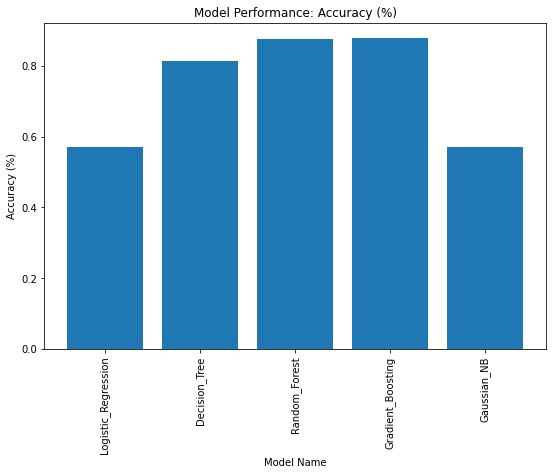

In [76]:
# Plot the performance
model_names = ["Logistic_Regression", "Decision_Tree", "Random_Forest", "Gradient_Boosting", "Gaussian_NB"]
fig = plt.figure(figsize = (9, 6))

# Create the bar plot
plt.bar(model_names, ml_model_accs)

# Set the appropriate titles and axis labels
plt.xlabel("Model Name")
plt.ylabel("Accuracy (%)")
plt.title("Model Performance: Accuracy (%)")
plt.xticks(rotation=90)
plt.show()

### After PCA

In [77]:
# Perform modeling on the dataset after doing pca
pca_ml_model_accs = []
for ml_model in ml_lst:
    y_pred, model_acc = ml_pipeline(pca_features, labels, ml_model)
    pca_ml_model_accs.append(model_acc)
    print("{}'s Accuracy (After PCA) = {:.4f} (%)".format(str(ml_model)[:-2], model_acc*100))

LogisticRegression's Accuracy (After PCA) = 82.8781 (%)
DecisionTreeClassifier's Accuracy (After PCA) = 76.7079 (%)
RandomForestClassifier's Accuracy (After PCA) = 84.2640 (%)
GradientBoostingClassifier's Accuracy (After PCA) = 83.2851 (%)
GaussianNB's Accuracy (After PCA) = 81.8250 (%)


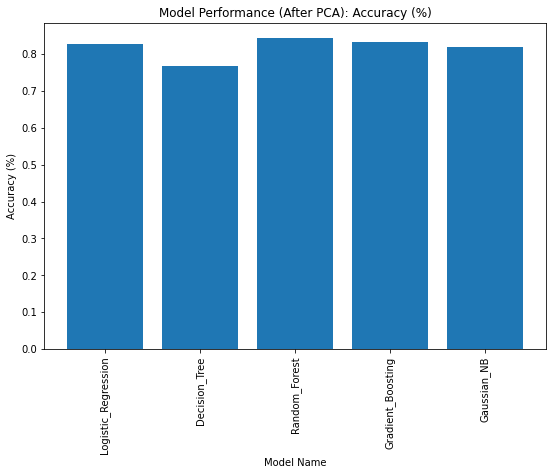

In [78]:
# Plot the performance
model_names = ["Logistic_Regression", "Decision_Tree", "Random_Forest", "Gradient_Boosting", "Gaussian_NB"]
fig = plt.figure(figsize = (9, 6))

# Create the bar plot
plt.bar(model_names, pca_ml_model_accs)

# Set the appropriate titles and axis labels
plt.xlabel("Model Name")
plt.ylabel("Accuracy (%)")
plt.title("Model Performance (After PCA): Accuracy (%)")
plt.xticks(rotation=90)
plt.show()

## Deep Learning Methods

*   Multilayer Perceptron (MLP)
*   Recurrent Neural Network (RNN)
  *   LSTM
  *   GRU





In [75]:
# Record the elapsed time
import time

# PyTorch Packages
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [76]:
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.__version__)
print(device)

1.13.0+cu116
cuda:0


### Develop a Pipeline for Deep Learning Models

In [77]:
# Setup a PyTorch Dataset
class CustDataset(Dataset):
    def __init__(self, features, labels):
        self._features = features.to_numpy()
        self._labels = labels.to_numpy()

    def __getitem__(self, index):
        x, y = self._features[index], self._labels[index]
        x = torch.tensor(x, dtype = torch.float32)
        y = torch.tensor(y, dtype = torch.float32)
        return x, y

    def __len__(self):
        return len(self._features)

Set up the Dataloader - Train / Test

Using the dataset (after PCA)

In [78]:
# Split the dataset into training & testing sets (80%:20%)
train_df = pca_data_df.sample(frac = 0.80).reset_index(drop = True)
test_df = pca_data_df.drop(train_df.index).reset_index(drop = True)

# Convert to PyTorch Datasets
train_dataset = CustDataset(train_df.drop(['label'], axis = 1), train_df['label'])
test_dataset = CustDataset(test_df.drop(['label'], axis = 1), test_df['label'])

In [79]:
batch_size = 64

# Set the batch_size to the specified batch, shuffle to True, and num_workers to 0
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True, num_workers = 0)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False, num_workers = 0)

Set up the pipeline for deep learning

In [80]:
# Pipeline for training
def dl_train_pipeline(num_epochs, train_loader, dl_model, device):
    """
    Uses the given deep learning model to train the dataset, and returns the trained model, losses, and training accuracies.
    """
    model = dl_model.to(device)

    # Set the loss criterion as CrossEntropyLoss
    criterion = nn.CrossEntropyLoss()

    # Set the optimizer as Adam
    optimizer = optim.Adam(model.parameters(), lr=1e-4) #lr - learning step

    # Log
    loss_LIST_log = []
    acc_LIST_log = []

    # Train
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            labels = labels.type(torch.LongTensor) # Cast to Float
            inputs, labels = inputs.to(device), labels.to(device) # Send data to device (CPU or GPU)

            # Get the total number of labels
            total += len(labels)

            # Reset to zero gradients for every mini-batch
            optimizer.zero_grad()

            # Feed the network with the training data to get the outputs
            outputs = model(inputs)

            # Get the predicted class from the maximum value
            predicted = torch.max(outputs.data, dim=1)[1]

            # Calculate the total correct predictions
            correct += (predicted == labels).sum().item()

            # Calculate the loss and its gradients
            loss = criterion(outputs, labels)
            loss.backward()

            # Update parameters
            optimizer.step()

            # Get the accumulated loss for each epoch
            running_loss += loss.item()

        # Compute the accuracy & average loss
        accuracy = 100 * correct / total
        avg_loss = running_loss / total

        # Save the Training Accuracy & Average Loss for each epoch
        acc_LIST_log.append(accuracy)
        loss_LIST_log.append(avg_loss) # Get the avg loss for each epoch

        # Print statistics
        print("The loss for Epoch {} is: {}, Accuracy = {} (%)".format(epoch, running_loss/len(train_loader), accuracy))

    # Return the trained model, losses, and training accuracie
    return model, loss_LIST_log, acc_LIST_log

In [81]:
# Pipeline for testing
def dl_test_pipeline(test_loader, trained_model, device):
    """
    Uses the trained model to test on the given testing data, and returns the testing accuracy.
    """
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            labels = labels.type(torch.LongTensor) # Cast to Float
            inputs, labels = inputs.to(device), labels.to(device)

            # Get the total number of labels
            total += len(labels)

            # Get the prediction outputs
            outputs = trained_model(inputs)

            # Get the predicted class from the maximum value
            predicted = torch.max(outputs.data, dim=1)[1]

            # Calculate the total correct predictions
            correct += (predicted == labels).sum()

    # Calculate the Test Accuracy
    test_acc = 100 * correct / total
    print('Test Accuracy = {} (%)'.format(test_acc.item()))
    return test_acc.item()

### MLP

Set Up MLP Model Architecture

In [82]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.mlp_stack = nn.Sequential(
            # 2 hidden layers
            nn.Linear(in_features = 9, out_features = 64),
            nn.ReLU(),
            nn.Linear(in_features = 64, out_features = 32),
            nn.ReLU(),
            # 3 classes: 0, 1, 2
            nn.Linear(in_features = 32, out_features = 3),
            nn.Softmax()
        )

    def forward(self, x):
        outputs = self.mlp_stack(x)
        return outputs

In [83]:
# Print the model summary
mlp = MLP()
mlp

MLP(
  (mlp_stack): Sequential(
    (0): Linear(in_features=9, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=3, bias=True)
    (5): Softmax(dim=None)
  )
)

In [84]:
# Train the model
mlp_start = time.time()
mlp_model, mlp_loss_log, mlp_acc_log = dl_train_pipeline(25, train_loader, mlp, device)
mlp_end = time.time()

The loss for Epoch 0 is: 0.7472602869695102, Accuracy = 80.83328913170318 (%)
The loss for Epoch 1 is: 0.7135880133598386, Accuracy = 83.47791284724399 (%)
The loss for Epoch 2 is: 0.7103090973901741, Accuracy = 83.81906906544896 (%)
The loss for Epoch 3 is: 0.7074701453024104, Accuracy = 84.0731882555465 (%)
The loss for Epoch 4 is: 0.7049300218231791, Accuracy = 84.3345404396696 (%)
The loss for Epoch 5 is: 0.703248015700474, Accuracy = 84.50499799887166 (%)
The loss for Epoch 6 is: 0.7021150562226487, Accuracy = 84.6033667176191 (%)
The loss for Epoch 7 is: 0.7012677468960713, Accuracy = 84.66870476364987 (%)
The loss for Epoch 8 is: 0.7006303331326269, Accuracy = 84.7137904264091 (%)
The loss for Epoch 9 is: 0.700054053961541, Accuracy = 84.77237767801604 (%)
The loss for Epoch 10 is: 0.6994999240456752, Accuracy = 84.83192932882638 (%)
The loss for Epoch 11 is: 0.6990240889003184, Accuracy = 84.87388069417455 (%)
The loss for Epoch 12 is: 0.6984924075320591, Accuracy = 84.95898892

In [85]:
# Calculate the time for training the MLP model
mlp_train_time = mlp_end - mlp_start
print("Time to train the model = {} (s)".format(mlp_train_time))

Time to train the model = 393.28377532958984 (s)


In [86]:
# Testing
mlp_acc = dl_test_pipeline(test_loader, mlp_model, device)

Test Accuracy = 86.57743072509766 (%)


### RNN

*   LSTM
*   GRU



Set Up LSTM Model Architecture

In [87]:
class RNN_LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self._lstm = nn.LSTM(input_size = 9, hidden_size = 32)
        # 3 classes: 0, 1, 2
        self._linear = nn.Linear(in_features = 32, out_features = 3)
        self._softmax = nn.Softmax()

    def forward(self, x):
        outputs, (hn, cn) = self._lstm(x)
        outputs = self._softmax(self._linear(outputs))
        return outputs

In [88]:
# Print the model summary
lstm = RNN_LSTM()
lstm

RNN_LSTM(
  (_lstm): LSTM(9, 32)
  (_linear): Linear(in_features=32, out_features=3, bias=True)
  (_softmax): Softmax(dim=None)
)

In [89]:
lstm_start = time.time()
lstm_model, lstm_loss_log, lstm_acc_log = dl_train_pipeline(25, train_loader, lstm, device)
lstm_end = time.time()

The loss for Epoch 0 is: 0.8042520093634584, Accuracy = 76.3746305145552 (%)
The loss for Epoch 1 is: 0.7198251478834995, Accuracy = 83.18280669100167 (%)
The loss for Epoch 2 is: 0.7151971051785299, Accuracy = 83.42800518846771 (%)
The loss for Epoch 3 is: 0.713540673274314, Accuracy = 83.5410809950671 (%)
The loss for Epoch 4 is: 0.7123912639445755, Accuracy = 83.64306621082731 (%)
The loss for Epoch 5 is: 0.7115140843678359, Accuracy = 83.70719875785383 (%)
The loss for Epoch 6 is: 0.710586557305902, Accuracy = 83.76771480786756 (%)
The loss for Epoch 7 is: 0.7097776536127793, Accuracy = 83.85354633697072 (%)
The loss for Epoch 8 is: 0.7088007975684109, Accuracy = 83.94202996388324 (%)
The loss for Epoch 9 is: 0.7076185357513628, Accuracy = 84.03003139119407 (%)
The loss for Epoch 10 is: 0.7066919482282201, Accuracy = 84.12406031352619 (%)
The loss for Epoch 11 is: 0.7058769145730726, Accuracy = 84.21736593645574 (%)
The loss for Epoch 12 is: 0.705114880722442, Accuracy = 84.3075372

In [90]:
# Calculate the time for training the LSTM model
lstm_train_time = lstm_end - lstm_start
print("Time to train the model = {} (s)".format(lstm_train_time))

Time to train the model = 452.61404490470886 (s)


In [91]:
# Testing
lstm_acc = dl_test_pipeline(test_loader, lstm_model, device)

Test Accuracy = 86.23603057861328 (%)


Set Up GRU Model Architecture

In [92]:
class RNN_GRU(nn.Module):
    def __init__(self):
        super().__init__()
        self._gru = nn.GRU(input_size = 9, hidden_size = 32)
        # 3 classes: 0, 1, 2
        self._linear = nn.Linear(in_features = 32, out_features = 3)
        self._softmax = nn.Softmax()

    def forward(self, x):
        outputs, hn = self._gru(x)
        outputs = self._softmax(self._linear(outputs))
        return outputs

In [93]:
# Print the model summary
gru = RNN_GRU()
gru

RNN_GRU(
  (_gru): GRU(9, 32)
  (_linear): Linear(in_features=32, out_features=3, bias=True)
  (_softmax): Softmax(dim=None)
)

In [94]:
gru_start = time.time()
gru_model, gru_loss_log, gru_acc_log = dl_train_pipeline(25, train_loader, gru, device)
gru_end = time.time()

The loss for Epoch 0 is: 0.7860873165257164, Accuracy = 78.17492272751383 (%)
The loss for Epoch 1 is: 0.7172491441371172, Accuracy = 83.30142779302064 (%)
The loss for Epoch 2 is: 0.7135800157334955, Accuracy = 83.54445639227902 (%)
The loss for Epoch 3 is: 0.7118102959452763, Accuracy = 83.67850788155249 (%)
The loss for Epoch 4 is: 0.710402256773681, Accuracy = 83.79520018516465 (%)
The loss for Epoch 5 is: 0.709287826504683, Accuracy = 83.87042332303034 (%)
The loss for Epoch 6 is: 0.7081054787432737, Accuracy = 83.97698943500673 (%)
The loss for Epoch 7 is: 0.7068267012705609, Accuracy = 84.08717204399589 (%)
The loss for Epoch 8 is: 0.7056769488623362, Accuracy = 84.22339343147702 (%)
The loss for Epoch 9 is: 0.7047485142941645, Accuracy = 84.33695143767811 (%)
The loss for Epoch 10 is: 0.7039485161934641, Accuracy = 84.40036068530208 (%)
The loss for Epoch 11 is: 0.7034165875040957, Accuracy = 84.44785734606984 (%)
The loss for Epoch 12 is: 0.7029041984147117, Accuracy = 84.4837

In [95]:
# Calculate the time for training the GRU model
gru_train_time = gru_end - gru_start
print("Time to train the model = {} (s)".format(gru_train_time))

Time to train the model = 458.5379309654236 (s)


In [96]:
# Testing
gru_acc = dl_test_pipeline(test_loader, gru_model, device)

Test Accuracy = 86.27171325683594 (%)


### Summary

Plot the training loss vs. epochs

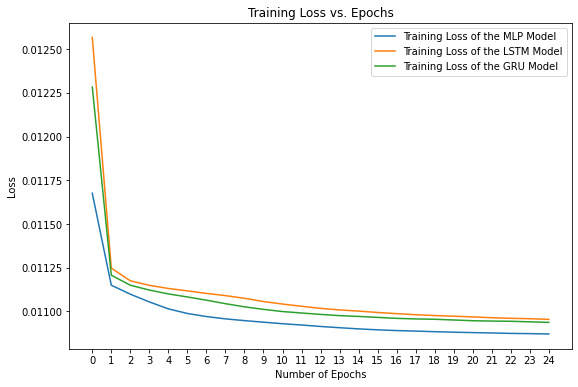

In [97]:
fig = plt.figure(figsize = (9, 6))

# Create the plots
plt.plot(mlp_loss_log, label = "Training Loss of the MLP Model")
plt.plot(lstm_loss_log, label = "Training Loss of the LSTM Model")
plt.plot(gru_loss_log, label = "Training Loss of the GRU Model")

# Set the appropriate titles and axis labels
plt.legend()
plt.xlabel("Number of Epochs")
plt.xticks(np.arange(25))
plt.ylabel("Loss")
plt.title("Training Loss vs. Epochs")
plt.show()

Plot the training accuracy vs epochs

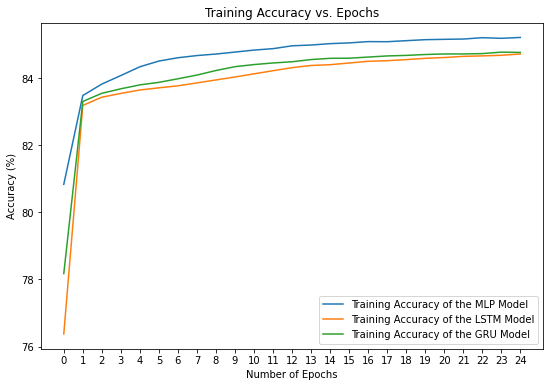

In [98]:
fig = plt.figure(figsize = (9, 6))

# Create the plots
plt.plot(mlp_acc_log, label = "Training Accuracy of the MLP Model")
plt.plot(lstm_acc_log, label = "Training Accuracy of the LSTM Model")
plt.plot(gru_acc_log, label = "Training Accuracy of the GRU Model")

# Set the appropriate titles and axis labels
plt.legend()
plt.xlabel("Number of Epochs")
plt.xticks(np.arange(25))
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy vs. Epochs")
plt.show()

Plot the testing results

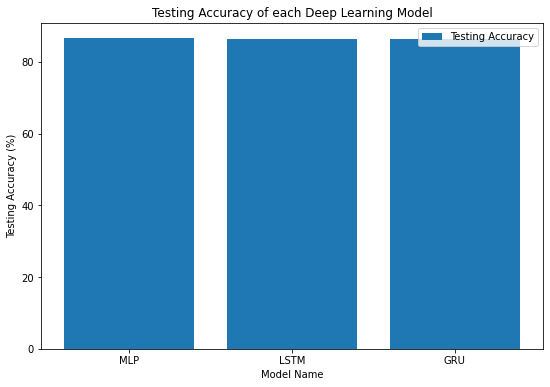

In [99]:
fig = plt.figure(figsize = (9, 6))
dl_lst = ["MLP", "LSTM", "GRU"]
dl_acc = [mlp_acc, lstm_acc, gru_acc]

# Create the plots
plt.bar(dl_lst, dl_acc, label = "Testing Accuracy")

# Set the appropriate titles and axis labels
plt.legend()
plt.xlabel("Model Name")
plt.ylabel("Testing Accuracy (%)")
plt.title("Testing Accuracy of each Deep Learning Model")
plt.show()

Plot the time cost for training each model

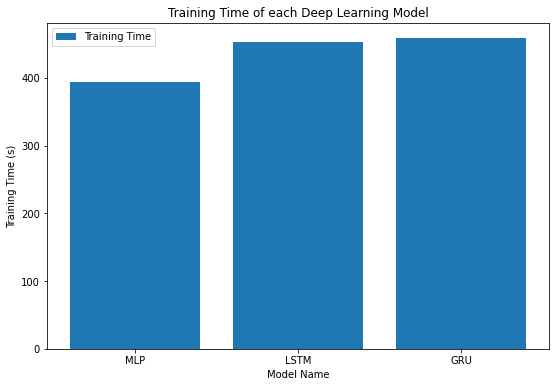

In [100]:
fig = plt.figure(figsize = (9, 6))
dl_time = [mlp_train_time, lstm_train_time, gru_train_time]

# Create the plots
plt.bar(dl_lst, dl_time, label = "Training Time")

# Set the appropriate titles and axis labels
plt.legend()
plt.xlabel("Model Name")
plt.ylabel("Training Time (s)")
plt.title("Training Time of each Deep Learning Model")
plt.show()

## Using a Fancy Classifier Package to Do Modeling

*   Lazy Classifier
  *   Resource Link: https://lazypredict.readthedocs.io/en/latest/usage.html#classification
*   Take Too Long Time to Run on the whole datasets
  *   Solution: Experiment on a smaller portion of the dataset



In [101]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
# Code from the resource website
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer

# Select 15000 rows randomly using sample()
sample_df = data_df.sample(n = 15000, random_state = 42).reset_index(drop = True)
X, y = sample_df.drop(['label'], axis = 1), sample_df['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Perform modeling
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models_df = models.reset_index().drop(['ROC AUC'], axis = 1)
models_df

100%|██████████| 29/29 [01:10<00:00,  2.44s/it]


,Model,Accuracy,Balanced Accuracy,F1 Score,Time Taken
0,XGBClassifier,0.88,0.85,0.88,2.10
1,LGBMClassifier,0.87,0.85,0.87,0.80
2,ExtraTreesClassifier,0.87,0.85,0.87,2.00
3,RandomForestClassifier,0.87,0.85,0.87,1.65
4,AdaBoostClassifier,0.86,0.85,0.86,0.56
5,BaggingClassifier,0.86,0.84,0.86,0.54
6,SVC,0.87,0.84,0.87,4.78
7,GaussianNB,0.85,0.82,0.85,0.04
8,QuadraticDiscriminantAnalysis,0.84,0.82,0.84,0.03
9,KNeighborsClassifier,0.83,0.80,0.83,1.25


Plot the results

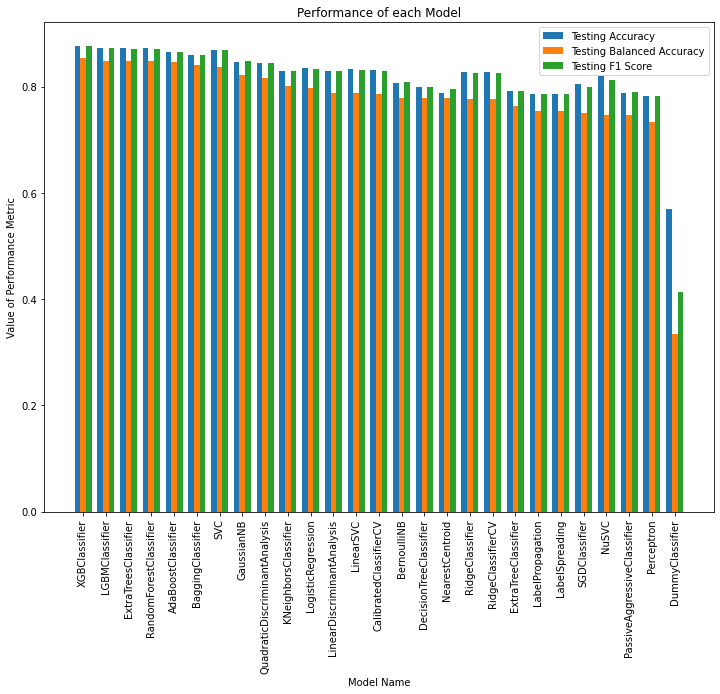

In [103]:
fig = plt.figure(figsize = (12, 9))
model_lst = models_df['Model'].tolist()

ind = np.arange(len(model_lst)) 
width = 0.25

# Create the plots
plt.bar(ind, models_df['Accuracy'].tolist(), width, label = "Testing Accuracy")
plt.bar(ind+width, models_df['Balanced Accuracy'].tolist(), width, label = "Testing Balanced Accuracy")
plt.bar(ind+width*2, models_df['F1 Score'].tolist(), width, label = "Testing F1 Score")

# Set the appropriate titles and axis labels
plt.legend()
plt.xlabel("Model Name")
plt.ylabel("Value of Performance Metric")
plt.title("Performance of each Model")
plt.xticks(ind+width, model_lst)
plt.xticks(rotation=90)
plt.show()

Plot the time cost for training each model

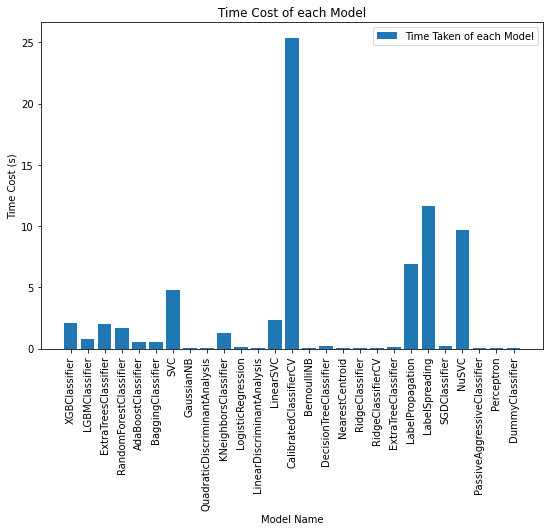

In [104]:
fig = plt.figure(figsize = (9, 6))

# Create the plots
plt.bar(model_lst, models_df['Time Taken'].tolist(), label = "Time Taken of each Model")

# Set the appropriate titles and axis labels
plt.legend()
plt.xlabel("Model Name")
plt.ylabel("Time Cost (s)")
plt.title("Time Cost of each Model")
plt.xticks(rotation=90)
plt.show()

# Results Analysis & Possible Explanations

*   The most significant factor that helps predict the recommendation
  *   
*   Pending



# Conclusions

*   Among all traditional machine learning models, **Random Forest** has relatively better performance, both before doing PCA and after doing PCA.
*   Three deep learning models (i.e., MLP, LSTM, and GRU) have similar performance. However, our designed **MLP model** slightly outperforms two others in terms of accuracy and training time.



# Description of Challenges

*   Initially, we used the Credit Card Fraud Detection dataset provided on Kaggle. However, that dataset is too clean, and all features are anonymous due to confidentiality issues. In addition, too many people did different modeling for the dataset, so we switched our dataset to Glassdoor Job Reviews.
*   Training time for some models, especially deep learning models, takes too long. Therefore, we use GPU to run these models.
*   This dataset has much textual data, so how to encode this textual data are essential.

# Potential Next Steps

*   Do More Deeper Analysis of our Modeling
  *   Calculate & plot the confusion matrix, calculate different metrics, and give more explanations based on these metrics and model assumptions.
*   Try More Different Ways to Encode the Textual Data
  *   In this project, we only chose to use the Affin score.
*   Fine-tune our Deep Learning Models
  *   Perform hyperparameter tuning and design a better model architecture for each of our deep learning models (e.g., MLP, LSTM, and GRU).
*   Text Classification Using BERT
  *   Reference Link: 
https://www.kaggle.com/code/nayansakhiya/text-classification-using-bert
  *   We can try to use large language models like BERT to do the text classification tasks. For example, try to analyze if the result of the text classification of the *headline* aligns with *recommend*, etc.



# References

*   CIS 545's Homeworks
*   Plotting Multiple Bar Charts: https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

